# 📊 Projeto 1: Análise Exploratória de Dados (EDA)
## 1. Introdução
Neste projeto, realizarei uma **Análise Exploratória de Dados (EDA)** completa. O objetivo é simular um cenário real onde os dados vêm com imperfeições, como valores ausentes e inconsistências. Demonstrando as técnicas fundamentais de **limpeza**, **tratamento** e **visualização de dados**  usando a biblioteca `pandas`.

---
## 2. Importação de Bibliotecas
Importando as bibliotecas necessárias para a manipulação, análise e visualização dos dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhorar a visualização dos gráficos
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

---
## 3. Criação de Dados Brutos (Simulação)
Para este projeto, criei um `DataFrame` de exemplo que simula um cenário real, com valores ausentes, tipos de dados incorretos e outliers.

In [2]:
# Dados de exemplo com imperfeições
data = {
    'ID_Transacao': range(101, 131),
    'Data_Venda': pd.to_datetime(np.random.choice(pd.date_range('2024-01-01', '2024-06-30'), 30)),
    'Categoria': np.random.choice(['Eletrônicos', 'Vestuário', 'Alimentos', 'Livros', np.nan], 30),
    'Metodo_Pagamento': np.random.choice(['Cartão', 'Boleto', 'Pix'], 30),
    'Valor_Venda': np.random.normal(loc=150, scale=40, size=30).round(2),
    'Avaliacao_Cliente': np.random.randint(1, 6, 30)
}

df = pd.DataFrame(data)

# Introduzindo valores ausentes e outliers propositalmente
df.loc[5, 'Valor_Venda'] = 1500  # Outlier
df.loc[12, 'Valor_Venda'] = 1200  # Outlier
df.loc[18:20, 'Categoria'] = np.nan
df.loc[25, 'Metodo_Pagamento'] = np.nan
df.loc[2, 'Avaliacao_Cliente'] = np.nan
df.loc[28, 'Data_Venda'] = np.nan

print("Dados Brutos:")
display(df.head())

Dados Brutos:


,ID_Transacao,Data_Venda,Categoria,Metodo_Pagamento,Valor_Venda,Avaliacao_Cliente
0,101,2024-06-06,nan,Cartão,157.33,3.0
1,102,2024-02-27,Alimentos,Cartão,152.98,2.0
2,103,2024-02-24,nan,Boleto,124.24,NaN
3,104,2024-05-07,nan,Pix,111.99,5.0
4,105,2024-04-29,nan,Cartão,117.42,5.0


---
## 4. Inspeção e Limpeza de Dados
Inspecionar os dados para identificar problemas e corrigi-los.

Informações iniciais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_Transacao       30 non-null     int64         
 1   Data_Venda         29 non-null     datetime64[ns]
 2   Categoria          27 non-null     object        
 3   Metodo_Pagamento   29 non-null     object        
 4   Valor_Venda        30 non-null     float64       
 5   Avaliacao_Cliente  29 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.5+ KB

Contagem de valores ausentes por coluna:
ID_Transacao         0
Data_Venda           1
Categoria            3
Metodo_Pagamento     1
Valor_Venda          0
Avaliacao_Cliente    1
dtype: int64

Contagem de valores ausentes após o tratamento:
ID_Transacao         0
Data_Venda           0
Categoria            0
Metodo_Pagamento     0
Valor_Ve

C:\Users\marlo\AppData\Local\Temp\ipykernel_30112\4079307252.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Categoria'].fillna('Outros', inplace=True)
C:\Users\marlo\AppData\Local\Temp\ipykernel_30112\4079307252.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

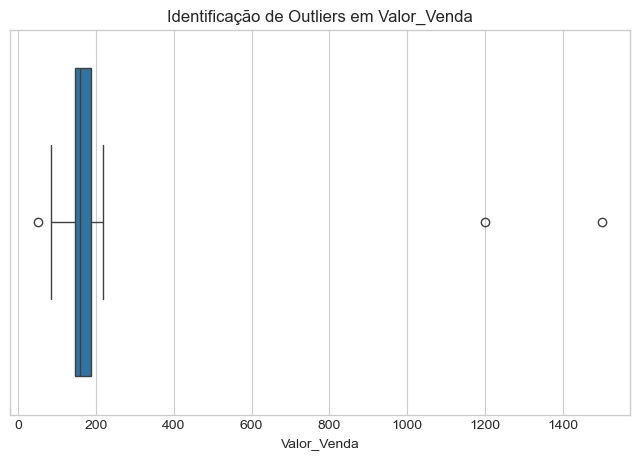


DataFrame após a remoção de outliers: 26 linhas restantes.


In [3]:
# 4.1. Verificando Tipos de Dados e Valores Ausentes
print("Informações iniciais do DataFrame:")
df.info()

# 4.2. Contagem de Valores Ausentes
print("\nContagem de valores ausentes por coluna:")
print(df.isnull().sum())

# 4.3. Tratando Valores Ausentes
# Para 'Categoria' e 'Metodo_Pagamento', vamos preencher com um valor padrão
df['Categoria'].fillna('Outros', inplace=True)
df['Metodo_Pagamento'].fillna('Não Informado', inplace=True)

# Para 'Data_Venda' e 'Avaliacao_Cliente', vamos remover as linhas, pois são poucos valores
df.dropna(subset=['Data_Venda', 'Avaliacao_Cliente'], inplace=True)

# Verificando novamente para garantir a limpeza
print("\nContagem de valores ausentes após o tratamento:")
print(df.isnull().sum())

# 4.4. Tratando Outliers em 'Valor_Venda'
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Valor_Venda'])
plt.title('Identificação de Outliers em Valor_Venda')
plt.show()

# Para este projeto, vamos apenas filtrar os outliers de forma simples
valor_medio = df['Valor_Venda'].mean()
valor_desvio_padrao = df['Valor_Venda'].std()
df_limpo = df[(df['Valor_Venda'] < valor_medio + 3 * valor_desvio_padrao) &
              (df['Valor_Venda'] > valor_medio - 3 * valor_desvio_padrao)]

print(f"\nDataFrame após a remoção de outliers: {df_limpo.shape[0]} linhas restantes.")

---
## 5. Análise Exploratória e Visualização
Com os dados limpos, realizarei a análise e criar visualizações para extrair insights.

Resumo Estatístico dos dados limpos:


,count,mean,min,25%,50%,75%,max,std
ID_Transacao,26.0,115.923077,101.0,109.25,116.5,122.75,130.0,8.503755
Data_Venda,26,2024-03-19 21:13:50.769230848,2024-01-01 00:00:00,2024-02-05 06:00:00,2024-03-19 00:00:00,2024-04-27 06:00:00,2024-06-13 00:00:00,NaN
Valor_Venda,26.0,154.041154,51.91,140.405,157.545,180.3325,218.62,40.521836
Avaliacao_Cliente,26.0,3.615385,1.0,2.0,4.0,5.0,5.0,1.498717



Total de Vendas por Categoria:
Categoria
Alimentos      1099.02
nan             822.30
Vestuário       661.50
Outros          573.66
Livros          491.99
Eletrônicos     356.60
Name: Valor_Venda, dtype: float64


C:\Users\marlo\AppData\Local\Temp\ipykernel_30112\1970150425.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values, palette='viridis')


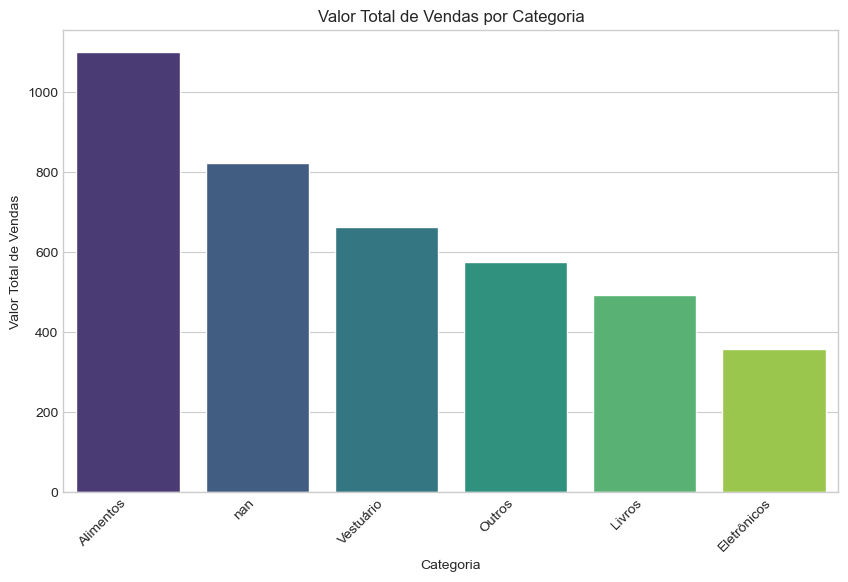


Tabela Dinâmica de Vendas por Categoria e Método de Pagamento:


Metodo_Pagamento,Boleto,Cartão,Não Informado,Pix
Categoria,,,,
Alimentos,592.15,506.87,0.00,0.00
Eletrônicos,198.84,157.76,0.00,0.00
Livros,154.61,181.34,0.00,156.04
Outros,404.14,169.52,0.00,0.00
Vestuário,0.00,196.03,170.77,294.70
nan,0.00,623.79,0.00,198.51


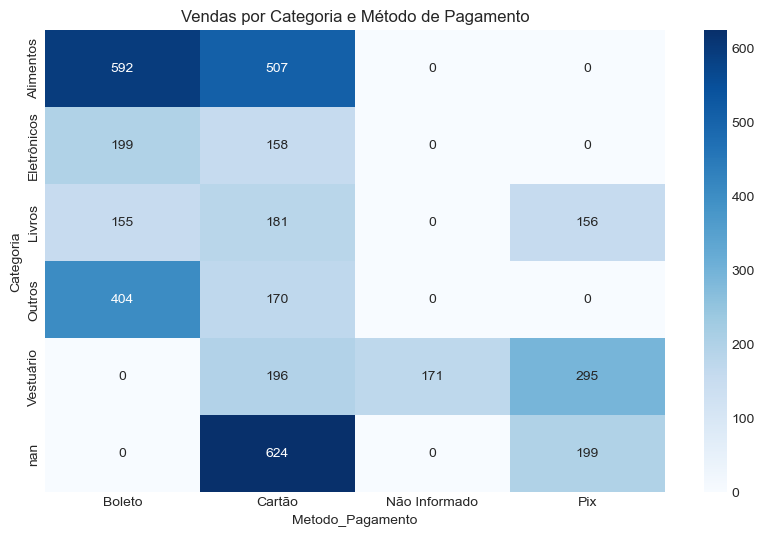

In [4]:
# 5.1. Resumo Estatístico dos Dados Limpos
print("Resumo Estatístico dos dados limpos:")
display(df_limpo.describe().T)

# 5.2. Análise da Distribuição das Vendas por Categoria
vendas_por_categoria = df_limpo.groupby('Categoria')['Valor_Venda'].sum().sort_values(ascending=False)
print("\nTotal de Vendas por Categoria:")
print(vendas_por_categoria)

plt.figure(figsize=(10, 6))
sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values, palette='viridis')
plt.title('Valor Total de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=45, ha='right')
plt.show()

# 5.3. Tabela Dinâmica: Vendas por Categoria e Método de Pagamento
tabela_dinamica = df_limpo.pivot_table(
    values='Valor_Venda',
    index='Categoria',
    columns='Metodo_Pagamento',
    aggfunc='sum',
    fill_value=0
)

print("\nTabela Dinâmica de Vendas por Categoria e Método de Pagamento:")
display(tabela_dinamica)

# Visualização da Tabela Dinâmica com um Mapa de Calor
plt.figure(figsize=(10, 6))
sns.heatmap(tabela_dinamica, annot=True, fmt=".0f", cmap='Blues')
plt.title('Vendas por Categoria e Método de Pagamento')
plt.show()

---
## 🏁 6. Conclusão
Neste projeto de **EDA**, eu:  
- 1.Inspecionei um conjunto de dados brutos e identifiquei problemas.  
- 2.Apliquei técnicas de limpeza, como o tratamento de valores ausentes e outliers, usando o `pandas`. 
- 3.Utilizei métodos de agregação (`groupby` e `pivot_table`) para resumir os dados e gerar insights.  
- 4.Criei visualizações (histograma, boxplot, barplot e heatmap) para apresentar os resultados de forma clara.


Este processo de **EDA** é a base para qualquer análise de dados confiável e eficaz.